# Experimento

In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
# from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [43]:
casearrest = pd.read_csv('../data/cleaned/casearrest_cl.csv', index_col=0)
jailhistory = pd.read_csv('../data/cleaned/jailhistory_cl.csv', index_col=0)
people = pd.read_csv('../data/cleaned/people_cl.csv', index_col=0)
prisonhistory = pd.read_csv('../data/cleaned/prisonhistory_cl.csv', index_col=0)
charge = pd.read_csv('../data/cleaned/charge_cl.csv', index_col=0)

In [36]:
#no of features
# nof_list=np.arange(1,13)            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# score_list =[]
# for n in range(len(nof_list)):
#     X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
#     model = LinearRegression()
#     rfe = RFE(model,nof_list[n])
#     X_train_rfe = rfe.fit_transform(X_train,y_train)
#     X_test_rfe = rfe.transform(X_test)
#     model.fit(X_train_rfe,y_train)
#     score = model.score(X_test_rfe,y_test)
#     score_list.append(score)
#     if(score>high_score):
#         high_score = score
#         nof = nof_list[n]
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))

def get_best_features(df, target):
    n_of_features = np.arange(1, df.shape[1]+1)
    high_score = 0
    nof = 0
    score_list = []
    for n in n_of_features:
        X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.3, random_state = 0)
        model = GaussianNB()
        rfe = RFE(model, n_features_to_select=n)
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe, y_train)
        score = model.score(X_test_rfe, y_test)
        score_list.append(score)
        if(score>high_score):
            high_score = score
            nof = n
    return nof, high_score, score_list

# Caso `casearrest`

Casearrest:
N of features: 3
High score: 0.012440693217863896
Score list: [0.008050461031538392, 0.012089443432227287, 0.012440693217863896]


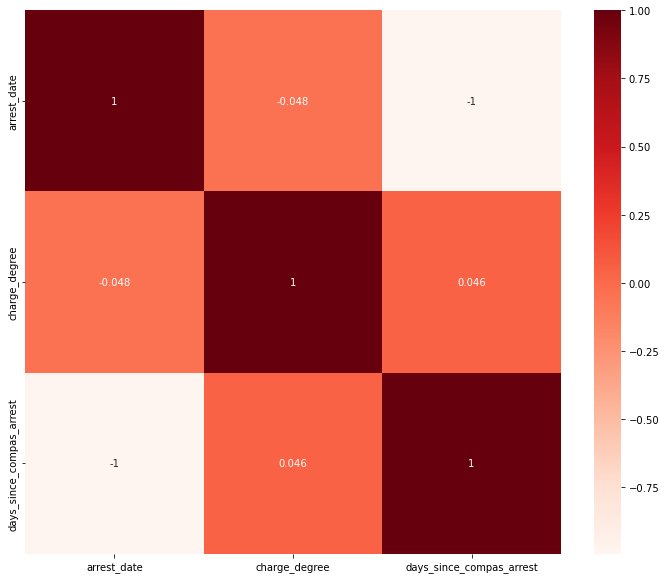

In [56]:
import seaborn as sns



casearrest_X = casearrest.drop(['decile_score'], axis='columns')
casearrest_y = casearrest['decile_score']
nof, high_score, score_list = get_best_features(casearrest_X, casearrest_y)
print('Casearrest:')
print('N of features:', nof)
print('High score:', high_score)
print('Score list:', score_list)


plt.figure(figsize=(12,10))
cor = casearrest_X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
# son todas, asi que da igual

In [38]:
jailhistory_X = jailhistory.drop(['decile_score'], axis='columns')
jailhistory_y = jailhistory['decile_score']
nof, high_score, score_list = get_best_features(jailhistory_X, jailhistory_y)
print('jailhistory:')
print('N of features:', nof)
print('High score:', high_score)
print('Score list:', score_list)

# son todoas, asi que da igual


jailhistory:
N of features: 3
High score: 0.16073495854007736
Score list: [0.01205922038852969, 0.03728484318530467, 0.16073495854007736]


people:
N of features: 21
High score: 0.4483002343946122
Score list: [-0.002203948720679083, 0.05160922465324702, 0.05484143558045118, 0.05655485210824163, 0.19831525083241408, 0.21585304056185683, 0.25488964016135207, 0.2955923588089834, 0.29608313107840356, 0.2961074867689938, 0.30004315375235535, 0.31510627808419733, 0.315586353006027, 0.3230720009696184, 0.322722439395302, 0.32242680988634365, 0.4476842560852924, 0.447684256085372, 0.44803476414327414, 0.44823772647231774, 0.4483002343946122]


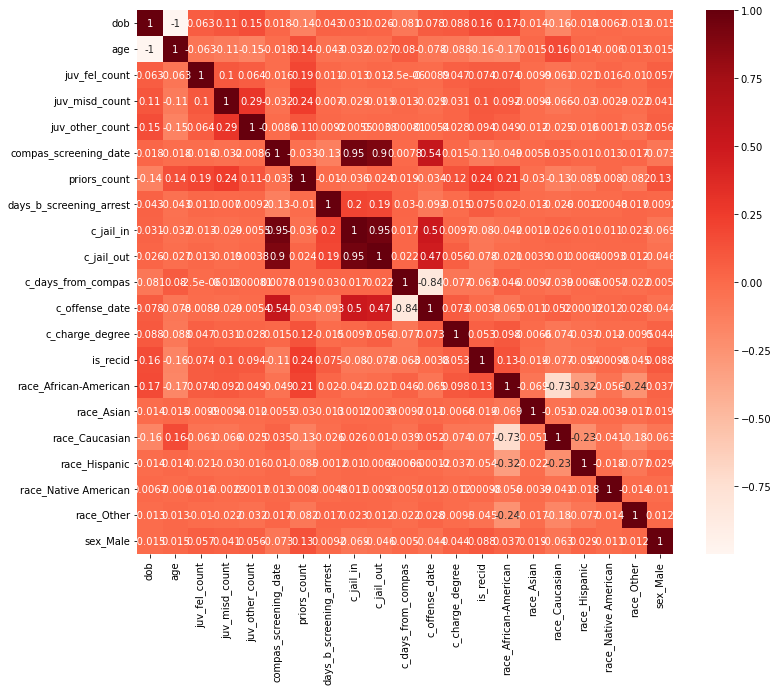

In [57]:
people_filter = people[people.columns[0:-9]]
people_filter.head()
df_race = pd.get_dummies(people_filter['race'], prefix='race', prefix_sep='_')
df_sex = pd.get_dummies(people_filter['sex'], prefix='sex',
                        prefix_sep='_', drop_first=True)

people_filter = pd.concat([people_filter, df_race, df_sex], axis=1).drop('sex', axis=1).drop('race', axis=1)
people_filter.head()
people_X = people_filter.drop(['decile_score'], axis='columns')
people_y = people_filter['decile_score']
nof, high_score, score_list = get_best_features(people_X, people_y)
print('people:')
print('N of features:', nof)
print('High score:', high_score)
print('Score list:', score_list)

plt.figure(figsize=(12,10))
cor = people_X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [53]:
prisonhistory_X = prisonhistory.drop(['decile_score'], axis='columns')
prisonhistory_y = prisonhistory['decile_score']
nof, high_score, score_list = get_best_features(prisonhistory_X, prisonhistory_y)
print('prisonhistory:')
print('N of features:', nof)
print('High score:', high_score)
print('Score list:', score_list)

prisonhistory:
N of features: 3
High score: 0.08858798413667868
Score list: [-0.006326693289959051, -0.008560941503100272, 0.08858798413667868]


In [54]:
charge_X = charge.drop(['decile_score'], axis='columns')
charge_y = charge['decile_score']
nof, high_score, score_list = get_best_features(charge_X, charge_y)
print('charge:')
print('N of features:', nof)
print('High score:', high_score)
print('Score list:', score_list)

charge:
N of features: 5
High score: 0.051760002435358166
Score list: [0.012744096442611985, 0.012690009075779662, 0.04284553150853987, 0.05066701750574032, 0.051760002435358166]
